In [31]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os

In [32]:
n_path = os.getcwd() + "\\woSubstrate\\n_step_80000.csv"
c_path = os.getcwd() + "\\woSubstrate\\c_step_80000.csv"
cOptim_path = os.getcwd() + "\\woSubstrateOptim\\c_step_80000.csv"

In [33]:
n_data = pd.read_csv(n_path, header=None)
c_data = pd.read_csv(c_path, header=None)
cOptim_data = pd.read_csv(cOptim_path, header = None)

In [34]:
n_array = n_data.values
c_array = c_data.values
cOptim_array = cOptim_data.values

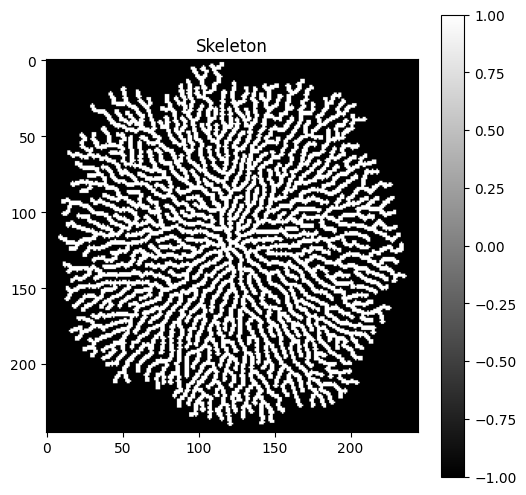

In [35]:
image_path = os.getcwd() + "\\Mycelium_model_real_image.png"
rgb_image = mpimg.imread(image_path)

# Step 2: Use only the first channel for simplicity
first_channel = rgb_image[:, :, 0]  # Extract the first channel
threshold = 0.5
skeleton = np.where(first_channel < threshold, 1, -1)  # Create bipolar image directly

# Step 3: Extract dimensions
dimensions = skeleton.shape

# Step 4: Plot the bipolar image
plt.figure(figsize=(6, 6))
plt.title('Skeleton')
plt.imshow(skeleton, cmap='gray')
plt.colorbar()
plt.show()

In [36]:
x = np.arange(c_array.shape[1])
y = np.arange(c_array.shape[0])
X, Y = np.meshgrid(x, y)

x2 = np.arange(cOptim_array.shape[1])
y2 = np.arange(cOptim_array.shape[0])
X2, Y2 = np.meshgrid(x2, y2)



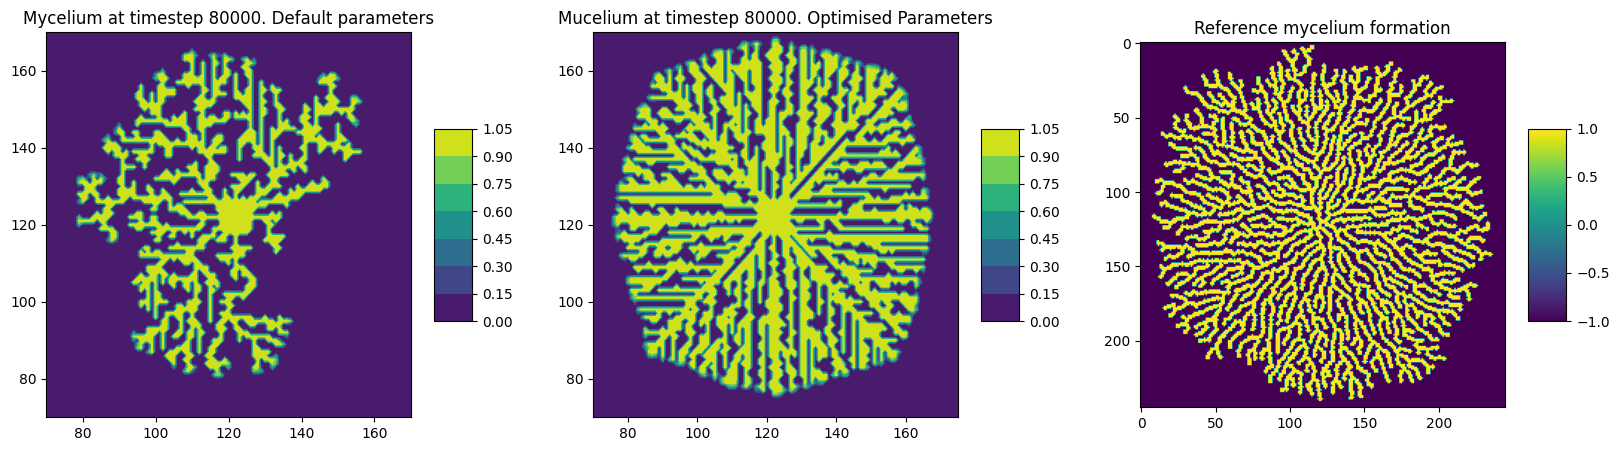

In [37]:
fig = plt.figure(figsize=(20, 5))

# Activator u
ax1 = fig.add_subplot(131)
mesh1 = ax1.contourf(X,Y,c_array)
ax1.set_title(f'Mycelium at timestep {80000}. Default parameters')
ax1.set_xlim(70,170)
ax1.set_ylim(70,170)
fig.colorbar(mesh1, ax=ax1, shrink=0.5, aspect=5)


# # Suppressor v
ax2 = fig.add_subplot(132)
mesh2 = ax2.contourf(X2,Y2,cOptim_array)
ax2.set_title(f'Mucelium at timestep {80000}. Optimised Parameters')
ax2.set_xlim(70,175)
ax2.set_ylim(70,170)

fig.colorbar(mesh2, ax=ax2, shrink=0.5, aspect=5)


# # Mycelium c
ax3 = fig.add_subplot(133)
mesh3 = ax3.imshow(skeleton)
ax3.set_title(f'Reference mycelium formation')
fig.colorbar(mesh3, ax=ax3, shrink=0.5, aspect=5)


# # Substrate n
# ax4 = fig.add_subplot(224)
# img4 = ax4.imshow(n.cpu().numpy(), cmap='ocean', vmin=0, vmax=1)
# ax4.set_title('Substrate')
# fig.colorbar(img4, ax=ax4)  # Add colorbar for this subplot

# plt.tight_layout()
# plt.show()